# Object Detection Using YoloV5 and Defining Classes

In [76]:
# Importing Required Libraries
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import shutil
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### YoloV5 for object detection

In [77]:
# Downloading Dependencies from Github
https://github.com/ultralytics/yolov5.git

In [ ]:
# Setting Current directory to YoloV5 Folder
%cd C:\Users\Downloads\yolov5-master\

In [79]:
# !pip install -U -r requirements.txt

In [73]:
# Function for Creating Folder Images
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [74]:
# For Creating Folders for different Poses
Pose_Class = ['Standing','Sitting','Lay_Down','Partial_Lay_Down','Jumping','Pose_Class']
for Pose in Pose_Class:
    createFolder('C:/Users/Downloads/Object Detection/'+Pose)

In [75]:
# Function For Moving Frames from Raw Folder to their respective Class folders
def move_file(old_file_path, new_directory):
    if not os.path.isdir(new_directory):
        os.mkdir(new_directory)
    base_name = os.path.basename(old_file_path)
    new_file_path = os.path.join(new_directory, base_name)
    # Deletes a file if that file already exists there, you can change this behavior
    if os.path.exists(new_file_path):
        os.remove(new_file_path)
    os.rename(old_file_path, new_file_path)

In [64]:
# Code for Creating of Frames and Saving in the Desired Folder Created
listing = os.listdir("C:/Users/Downloads/Frame_Images/")
copy_folder = "C:/Users/Downloads/Frame_Images/"
columns=['Image_Name', 'xmin','ymin','xmax','ymax','confidence','class','name','Width','Height','Ratio']
df = pd.DataFrame(columns=columns)
for frame in listing:
    Frame = copy_folder+frame
    # image = cv2.imread(Frame)
    # height, width = image.shape[:2]
    # resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
    # fig = plt.gcf()
    # fig.set_size_inches(18, 10)
    # plt.axis("off")
    # plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    # plt.show()
    ####### Using YoloV5 for Object Detection in Image
    # !python detect.py --source Frame --weights yolov5s.pt --conf 0.4
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 
    predictions = model(Frame)
    labels, cord_thres = predictions.xyxyn[0][:, -1].numpy(), predictions.xyxyn[0][:, :-1].numpy()
    print(labels)
    print(cord_thres)
    predictions.print()  # or .show(), .save(), .crop(), .pandas(), etc.
    predictions.xyxy[0]  # im predictions (tensor)
    a=predictions.pandas().xyxy[0]
    x=a[a['class']==0]
    x['Image_Name']=frame
    x['Width']=x['xmax']-x['xmin']
    # print(x['Width'][0])
    x['Height']=x['ymax']-x['ymin']
    # print(x['Height'][0])
    x['Ratio']=x['Height']/x['Width']
    print(x)
    for r in x['Ratio']:
        print(r)
        if r > 3 :
            Pose_Class = 'Standing'
            x['Pose_Class']=Pose_Class
        elif (r > 1.5) and (r <= 3):
            Pose_Class = 'Sitting'
            x['Pose_Class']=Pose_Class
        elif (r > 0) and (r <= 0.5):
            Pose_Class = 'Lay_Down'
            x['Pose_Class']=Pose_Class
        elif (r > 1) and (r <= 1.5):
            Pose_Class = 'Partial_Lay_Down'
            x['Pose_Class']=Pose_Class
        else:
            Pose_Class = 'Jumping'
            x['Pose_Class']=Pose_Class
        # print(Class)
        df = df.append(x)
        destination_folder = "C:/Users/Downloads/Object Detection/"+Pose_Class
        filename = os.path.join(cop_folder, frame)
        move_file(filename, destination_folder)

Using cache found in C:\Users\ebicshr/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-26 Python-3.9.7 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
C:\Users\ebicshr\AppData\Local\Temp/ipykernel_14688/3131948579.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Width']=x['xmax']-x['xmin']
C:\Users\ebicshr\AppData\Local\Temp/ipykernel_14688/3131948579.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Height']=x['

[          0          58          73          75          75          73          73          75          73          73          73          58          75]
[[    0.16465      0.5619     0.90876     0.92335      0.9309]
 [    0.27597     0.24863     0.49465     0.43108     0.80175]
 [    0.40976     0.54161     0.48092     0.59193     0.71119]
 [   0.057576      0.3692     0.10637     0.42674     0.63552]
 [    0.39859     0.36755     0.47424     0.43224     0.63518]
 [    0.50548     0.47126     0.56403     0.52363     0.57704]
 [    0.30485      0.4736     0.35911     0.52742     0.50146]
 [   0.099091     0.39061      0.1622     0.42637     0.49405]
 [    0.32973      0.4751     0.38442     0.52829      0.4698]
 [   0.053117     0.57418     0.17226     0.59072     0.42987]
 [     0.2427     0.63583     0.37042     0.65864     0.32916]
 [  0.0076573     0.24116     0.16253      0.4289     0.30232]
 [    0.15622     0.38687     0.18843     0.42845       0.258]]
image 1/1: 3840x2160 1

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
C:\Users\ebicshr\AppData\Local\Temp/ipykernel_14688/3131948579.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(x)
Using cache found in C:\Users\ebicshr/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-26 Python-3.9.7 torch-1.12.1+cpu CPU



[          0]
[[   0.005466     0.12254     0.88526      0.8311     0.71579]]
image 1/1: 884x965 1 person
Speed: 19.9ms pre-process, 238.2ms inference, 0.0ms NMS per image at shape (1, 3, 608, 640)
       xmin        ymin        xmax        ymax  confidence  class    name  \
0  5.274675  108.328033  854.272461  734.694092    0.715788      0  person   

        Width      Height     Ratio  
0  848.997786  626.366058  0.737771  
0.7377711327934543


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


[          0]
[[    0.26146     0.47029     0.82227     0.80806     0.79198]]
image 1/1: 1080x1920 1 person
Speed: 19.9ms pre-process, 155.7ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)
         xmin        ymin         xmax        ymax  confidence  class    name  \
0  502.001129  507.917542  1578.751831  872.707031    0.791977      0  person   

         Width     Height     Ratio  
0  1076.750702  364.78949  0.338787  
0.3387873247734523


C:\Users\ebicshr\AppData\Local\Temp/ipykernel_14688/3131948579.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(x)


# Let's Check for some samples for each class

### Sitting

In [87]:
# Using YoloV5 for Object Detection in Image
!python detect.py --source C:/Users/Downloads/Frame_Images/frame6910.jpg --weights yolov5s.pt --conf 0.4

detect: weights=['yolov5s.pt'], source=C:/Users/ebicshr/Downloads/Frame_Images/side_sit.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2022-8-23 Python-3.9.7 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 C:\Users\ebicshr\Downloads\Frame_Images\side_sit.jpg: 640x448 1 person, 612.9ms
Speed: 8.1ms pre-process, 612.9ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp17


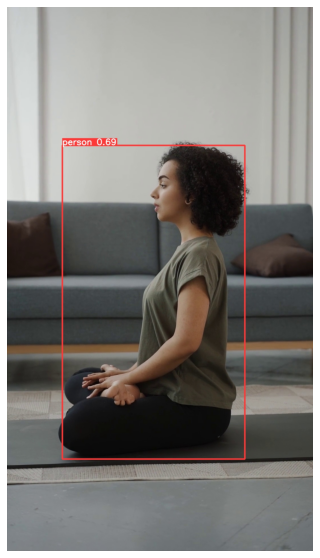

In [89]:
# Read the YoloV5s Output Image stored in the detect folder of yolov5-master
image = cv2.imread("C:\\Users\\Downloads\\yolov5-master\\runs\\detect\exp7\\frame6910.jpg") 
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [95]:
#For getting evaluation metrics
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 
# model = torch.hub.load('ultralytics/yolov5', 'custom', path_or_model='best.pt') 
predictions = model("C:\\Users\\Downloads\\yolov5-master\\data\\images\\frame6910.jpg")
# results = model(input_images)
labels, cord_thres = predictions.xyxyn[0][:, -1].numpy(), predictions.xyxyn[0][:, :-1].numpy()
print(predictions)
print(labels)
print(cord_thres)
predictions.print()  # or .show(), .save(), .crop(), .pandas(), etc.
predictions.xyxy[0]  # im predictions (tensor)
a=predictions.pandas().xyxy[0]
print(a)
# x=a[a['class']==0]
x=a.copy()
x['Width']=x['xmax']-x['xmin']
print(x['Width'])
x['Height']=x['ymax']-x['ymin']
print(x['Height'])
x['Ratio']=x['Height']/x['Width']
print(x['Ratio'])
x

0    643.529297
1    819.284882
Name: Width, dtype: float64
0    1107.794037
1    1098.607056
Name: Height, dtype: float64
0    1.721435
1    1.340934
Name: Ratio, dtype: float64


,xmin,ymin,xmax,ymax,confidence,class,name,Width,Height,Ratio
0,195.404846,487.548248,838.934143,1595.342285,0.693094,0,person,643.529297,1107.794037,1.721435
1,143.809296,498.552734,963.094177,1597.159790,0.322317,57,couch,819.284882,1098.607056,1.340934


### Standing

In [49]:
# Using YoloV5 for Object Detection in Image
!python detect.py --source ./data/images/frame3.jpg --weights yolov5s.pt --conf 0.4

detect: weights=['yolov5s.pt'], source=./data/images/standing3.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2022-8-23 Python-3.9.7 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 C:\Users\ebicshr\Downloads\yolov5-master\data\images\standing3.jpg: 640x416 1 person, 181.5ms
Speed: 0.0ms pre-process, 181.5ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp8


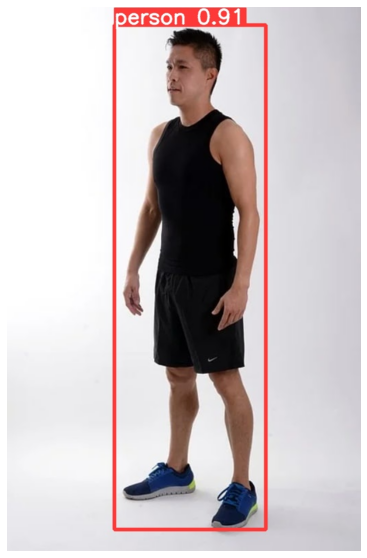

In [80]:
# Read the YoloV5s Output Image stored in the detect folder of yolov5s-master
image = cv2.imread("C:\\Users\\Downloads\\yolov5-master\\runs\\detect\exp8\\frame3.jpg") 
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# # Using YoloV5 for Object Detection in Video
# !python detect.py --source ./data/images/sitting_med.mp4 --weights yolov5s.pt --conf 0.4

In [81]:
# For getting evaluation metrics
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 
# model = torch.hub.load('ultralytics/yolov5', 'custom', path_or_model='best.pt') 
predictions = model("C:\\Users\\Downloads\\yolov5-master\\data\\images\\frame3.jpg")
# results = model(input_images)
labels, cord_thres = predictions.xyxyn[0][:, -1].numpy(), predictions.xyxyn[0][:, :-1].numpy()
print(predictions)
print(labels)
print(cord_thres)
predictions.print()  # or .show(), .save(), .crop(), .pandas(), etc.
predictions.xyxy[0]  # im predictions (tensor)
a=predictions.pandas().xyxy[0]
x=a[a['class']==0]
x['Width']=x['xmax']-x['xmin']
print(x['Width'][0])
x['Height']=x['ymax']-x['ymin']
print(x['Height'][0])
x['Ratio']=x['Height']/x['Width']
print(x['Ratio'][0])
x

Using cache found in C:\Users\ebicshr/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-26 Python-3.9.7 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


image 1/1: 798x519 1 person
Speed: 17.3ms pre-process, 333.3ms inference, 8.1ms NMS per image at shape (1, 3, 640, 448)

[          0]
[[    0.31131    0.035288     0.74067     0.95992     0.89764]]


### Jumping

In [65]:
# Using YoloV5 for Object Detection in Image
!python detect.py --source ./data/images/frame6243.jpg --weights yolov5s.pt --conf 0.4

detect: weights=['yolov5s.pt'], source=./data/images/Jumping6243.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2022-8-23 Python-3.9.7 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 C:\Users\ebicshr\Downloads\yolov5-master\data\images\Jumping6243.jpg: 384x640 1 person, 168.5ms
Speed: 0.0ms pre-process, 168.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp13


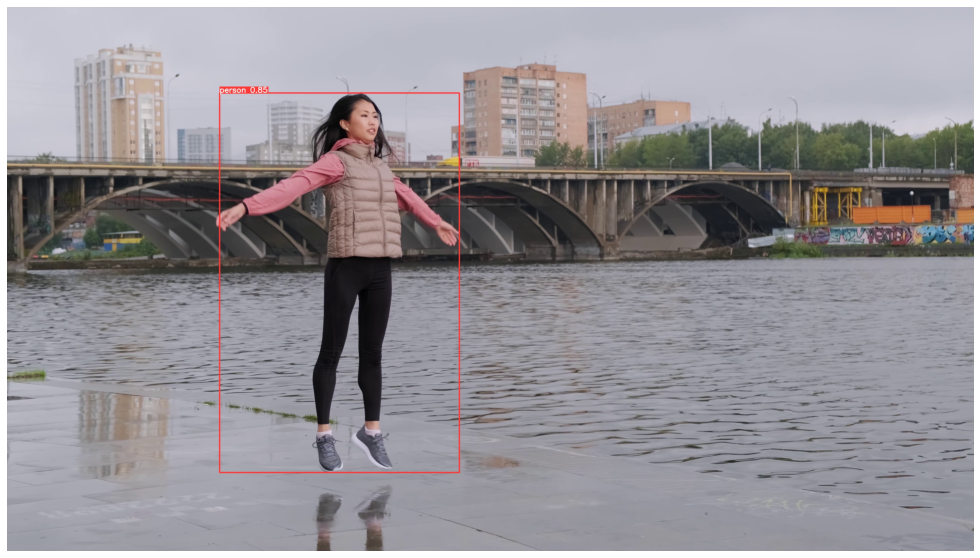

In [86]:
# Read the YoloV5s Output Image stored in the detect folder of yolov5s-master
image = cv2.imread("C:\\Users\\Downloads\\yolov5-master\\runs\\detect\exp9\\frame6243.jpg") 
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [87]:
# For getting evaluation metrics
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 
# model = torch.hub.load('ultralytics/yolov5', 'custom', path_or_model='best.pt') 
predictions = model("C:\\Users\\Downloads\\yolov5-master\\data\\images\\frame6243.jpg")
# results = model(input_images)
labels, cord_thres = predictions.xyxyn[0][:, -1].numpy(), predictions.xyxyn[0][:, :-1].numpy()
print(predictions)
print(labels)
print(cord_thres)
predictions.print()  # or .show(), .save(), .crop(), .pandas(), etc.
predictions.xyxy[0]  # im predictions (tensor)
a=predictions.pandas().xyxy[0]
x=a[a['class']==0]
x['Width']=x['xmax']-x['xmin']
print(x['Width'][0])
x['Height']=x['ymax']-x['ymin']
print(x['Height'][0])
x['Ratio']=x['Height']/x['Width']
print(x['Ratio'][0])
x

Using cache found in C:\Users\ebicshr/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-26 Python-3.9.7 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


image 1/1: 2160x3840 1 person
Speed: 158.9ms pre-process, 296.9ms inference, 2.1ms NMS per image at shape (1, 3, 384, 640)

[          0]
[[    0.21983     0.15794     0.46779     0.85566     0.84754]]
image 1/1: 2160x3840 1 person
Speed: 158.9ms pre-process, 296.9ms inference, 2.1ms NMS per image at shape (1, 3, 384, 640)
952.150390625
1507.0780639648438
1.5828151506355885


,xmin,ymin,xmax,ymax,confidence,class,name,Width,Height,Ratio
0,844.144653,341.140686,1796.295044,1848.21875,0.847541,0,person,952.150391,1507.078064,1.582815


### Lay Down

In [63]:
# Using YoloV5 for Object Detection in Image
!python detect.py --source ./data/images/frame4.jpg --weights yolov5s.pt --conf 0.4

detect: weights=['yolov5s.pt'], source=./data/images/Lay_Down4.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2022-8-23 Python-3.9.7 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 C:\Users\ebicshr\Downloads\yolov5-master\data\images\Lay_Down4.jpg: 352x640 1 person, 149.6ms
Speed: 1.0ms pre-process, 149.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp12


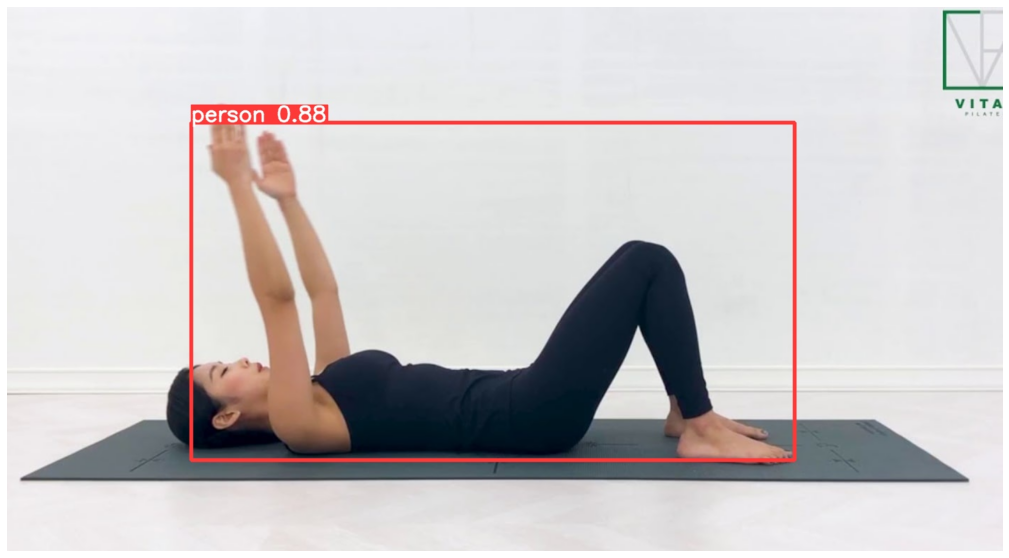

In [88]:
# Read the YoloV5s Output Image stored in the detect folder of yolov5s-master
image = cv2.imread("C:\\Users\\Downloads\\yolov5-master\\runs\\detect\exp12\\frame4.jpg") 
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [89]:
# For evaluation 
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 
# model = torch.hub.load('ultralytics/yolov5', 'custom', path_or_model='best.pt') 
predictions = model("C:\\Users\\Downloads\\yolov5-master\\data\\images\\frame4.jpg")
# results = model(input_images)
labels, cord_thres = predictions.xyxyn[0][:, -1].numpy(), predictions.xyxyn[0][:, :-1].numpy()
print(predictions)
print(labels)
print(cord_thres)
predictions.print()  # or .show(), .save(), .crop(), .pandas(), etc.
predictions.xyxy[0]  # im predictions (tensor)
a=predictions.pandas().xyxy[0]
x=a[a['class']==0]
x['Width']=x['xmax']-x['xmin']
print(x['Width'][0])
x['Height']=x['ymax']-x['ymin']
print(x['Height'][0])
x['Ratio']=x['Height']/x['Width']
print(x['Ratio'][0])
x

Using cache found in C:\Users\ebicshr/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-26 Python-3.9.7 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


image 1/1: 769x1408 1 person
Speed: 67.9ms pre-process, 246.8ms inference, 0.0ms NMS per image at shape (1, 3, 352, 640)

[          0]
[[    0.18463      0.2124     0.79039      0.8317     0.88315]]
image 1/1: 769x1408 1 person
Speed: 67.9ms pre-process, 246.8ms inference, 0.0ms NMS per image at shape (1, 3, 352, 640)
852.9230041503906
476.2392883300781
0.5583614066130942


,xmin,ymin,xmax,ymax,confidence,class,name,Width,Height,Ratio
0,259.95224,163.337189,1112.875244,639.576477,0.883153,0,person,852.923004,476.239288,0.558361


### Partial Lay Down

In [92]:
# Using YoloV5 for Object Detection in Image
!python detect.py --source ./data/images/frame4710.jpg --weights yolov5s.pt --conf 0.4

detect: weights=['yolov5s.pt'], source=./data/images/Partialay4710.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2022-8-23 Python-3.9.7 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 C:\Users\ebicshr\Downloads\yolov5-master\data\images\Partialay4710.jpg: 640x384 1 person, 1 potted plant, 5 books, 3 vases, 304.9ms
Speed: 0.0ms pre-process, 304.9ms inference, 50.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp18


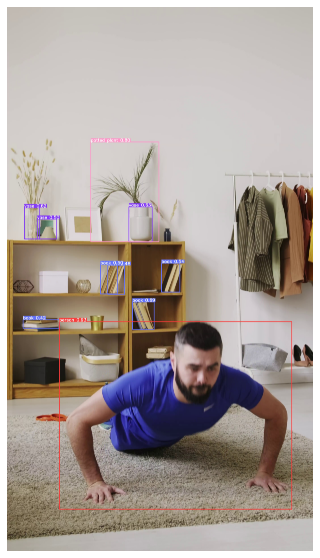

In [93]:
# Read the YoloV5s Output Image stored in the detect folder of yolov5s-master
image = cv2.imread("C:\\Users\\Downloads\\yolov5-master\\runs\\detect\exp18\\frame4710.jpg") 
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [95]:
# For getting Evaluation metrics
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 
# model = torch.hub.load('ultralytics/yolov5', 'custom', path_or_model='best.pt') 
predictions = model("C:\\Users\\Downloads\\yolov5-master\\data\\images\\frame4710.jpg")
# results = model(input_images)
labels, cord_thres = predictions.xyxyn[0][:, -1].numpy(), predictions.xyxyn[0][:, :-1].numpy()
print(predictions)
print(labels)
print(cord_thres)
predictions.print()  # or .show(), .save(), .crop(), .pandas(), etc.
predictions.xyxy[0]  # im predictions (tensor)
a=predictions.pandas().xyxy[0]
# x=a[a['class']==0]
x=a.copy()
x['Width']=x['xmax']-x['xmin']
print(x['Width'][0])
x['Height']=x['ymax']-x['ymin']
print(x['Height'][0])
x['Ratio']=x['Height']/x['Width']
print(x['Ratio'][0])
x

Using cache found in C:\Users\ebicshr/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-26 Python-3.9.7 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


image 1/1: 3840x2160 1 person, 1 cup, 2 potted plants, 6 books, 4 vases
Speed: 123.9ms pre-process, 279.9ms inference, 4.0ms NMS per image at shape (1, 3, 640, 384)

[          0          58          73          75          75          73          75          73          73          73          73          41          58          75]
[[    0.17091     0.57817      0.9305     0.92325     0.93098]
 [    0.27353     0.24799     0.49618     0.43118     0.79677]
 [    0.40991       0.542      0.4805     0.59278     0.68532]
 [      0.398     0.36711     0.47389     0.43185     0.62988]
 [   0.056574      0.3688     0.10706     0.42627     0.62349]
 [     0.5048     0.47092     0.56487     0.52388     0.54484]
 [   0.098436     0.38989      0.1626     0.42638     0.50275]
 [    0.30495     0.47326     0.35997     0.52723      0.4958]
 [    0.32927     0.47478     0.38429     0.52813     0.47596]
 [   0.052481     0.57438     0.17226     0.59068     0.41763]
 [    0.45395     0.62313     0.53

,xmin,ymin,xmax,ymax,confidence,class,name,Width,Height,Ratio
0,369.162781,2220.185059,2009.890259,3545.294678,0.930978,0,person,1640.727478,1325.109619,0.807635
1,590.823120,952.264893,1071.742798,1655.726440,0.796767,58,potted plant,480.919678,703.461548,1.462742
2,885.409851,2081.271484,1037.870605,2276.272949,0.685321,73,book,152.460754,195.001465,1.279027
3,859.687683,1409.715576,1023.592896,1658.294800,0.629879,75,vase,163.905212,248.579224,1.516604
4,122.200790,1416.194458,231.251175,1636.864380,0.623489,75,vase,109.050385,220.669922,2.023559
5,1090.376465,1808.339844,1220.110474,2011.707397,0.544844,73,book,129.734009,203.367554,1.567573
6,212.621216,1497.159424,351.225677,1637.294800,0.502753,75,vase,138.604462,140.135376,1.011045
7,658.697083,1817.332520,777.529236,2024.544556,0.495805,73,book,118.832153,207.212036,1.743737
8,711.218994,1823.156006,830.056274,2028.017334,0.475959,73,book,118.837280,204.861328,1.723881
9,113.359886,2205.618896,372.082672,2268.200195,0.417627,73,book,258.722786,62.581299,0.241886
